In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
# Importer le dataset "taxis" de Seaborn
df = sns.load_dataset('taxis')

In [117]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [118]:
# creer une nouvelle colonne "trip_duration" qui contient la durée du trajet en minutes
df['trip_duration'] = (df['dropoff'] - df['pickup']).dt.total_seconds() / 60

In [119]:
# creer une nouvelle colonne "pickup_hour" qui contient l'heure de la prise en charge
df['pickup_hour'] = df['pickup'].dt.hour

In [120]:
# creer une nouvelle colonne "pickup_dayofweek" qui contient le jour de la semaine de la prise en charge (0 = lundi, 6 = dimanche)
df['pickup_dayofweek'] = df['pickup'].dt.day_name()

In [121]:
# j'impose un ordre naturel pour les jours de la semaine, ça va être utile pour les visualisations

# Ordre naturel des jours de la semaine
jours_semaine = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Transformer la colonne en type catégorique avec un ordre défini
df['pickup_dayofweek'] = pd.Categorical(df['pickup_dayofweek'],
                                        categories=jours_semaine,
                                        ordered=True)


In [122]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration,pickup_hour,pickup_dayofweek
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.250000,20,Saturday
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.083333,16,Monday
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.400000,17,Wednesday
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,25.866667,1,Sunday
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,9.533333,13,Saturday


# Distribution

### Histogramme

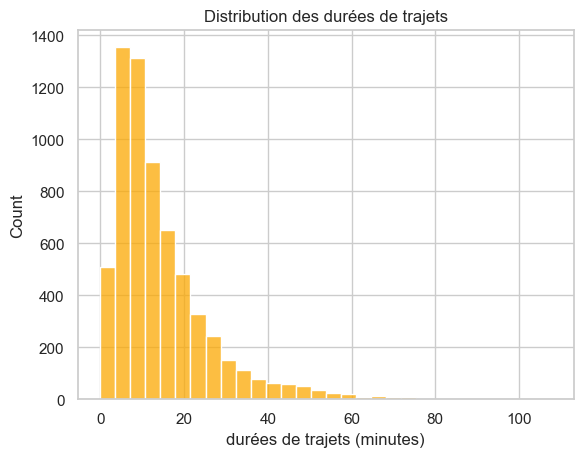

In [123]:
#histrogramme des durées de trajets avec Seaborn
sns.histplot(df['trip_duration'], bins=30, color='#fca903') # je peux changer la couleur et le nombre de bins
plt.xlabel('durées de trajets (minutes)')
plt.title('Distribution des durées de trajets')
plt.show()

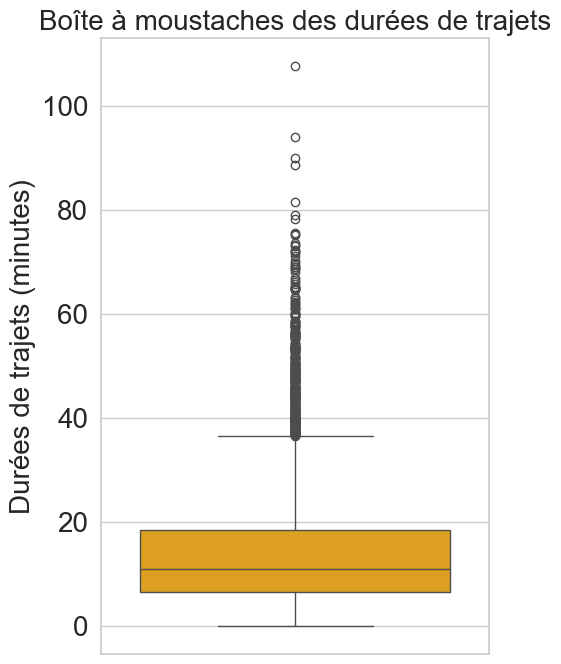

In [124]:
# Boite à moustaches de la duree des trajets 
plt.figure(figsize=(5, 8))
sns.boxplot(x=0, y='trip_duration', data=df, color='#fca903')
plt.xticks([])
plt.yticks(fontsize=20)
plt.ylabel('Durées de trajets (minutes)',size=20)
plt.title('Boîte à moustaches des durées de trajets',size=20)
plt.show()

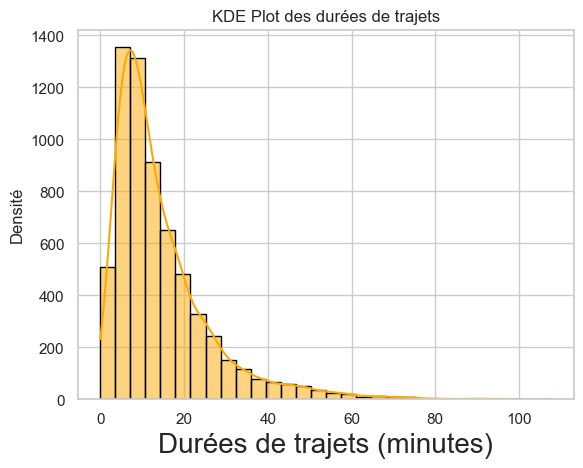

In [125]:
#kde plot of des durées de trajets
#sns.kdeplot(df['trip_duration'], color='#fca903',fill=True)

sns.histplot(
    df['trip_duration'],
    bins=30,
    color="#fca903",          
    edgecolor="black",
    kde=True,
)
plt.xlabel('Durées de trajets (minutes)',size=20)
plt.ylabel('Densité')
plt.title('KDE Plot des durées de trajets')
plt.show()

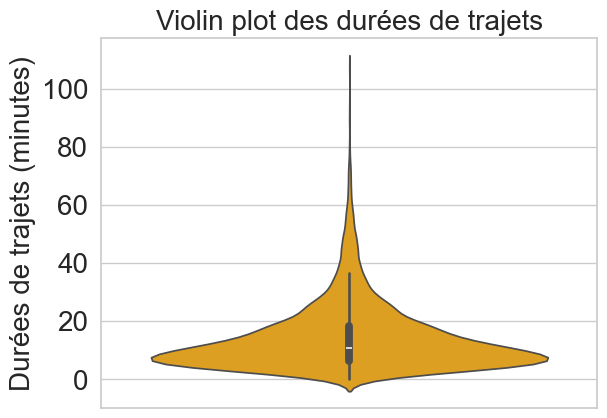

In [126]:
# je peux aussi utiliser un violon plot pour visualiser la distribution des durées de trajets (KDE + boxplot)
sns.violinplot(x=0, y='trip_duration', data=df, color='#fca903')
plt.xticks([])
plt.yticks(fontsize=20)
plt.ylabel('Durées de trajets (minutes)',size=20)
plt.title('Violin plot des durées de trajets',size=20)
plt.show()

# Comparaison

C’est beaucoup plus facile de le faire avec Seaborn à partir de Pandas, qui s’occupe automatiquement de l’agrégation des données pour nous.

### Diagrammes à barres

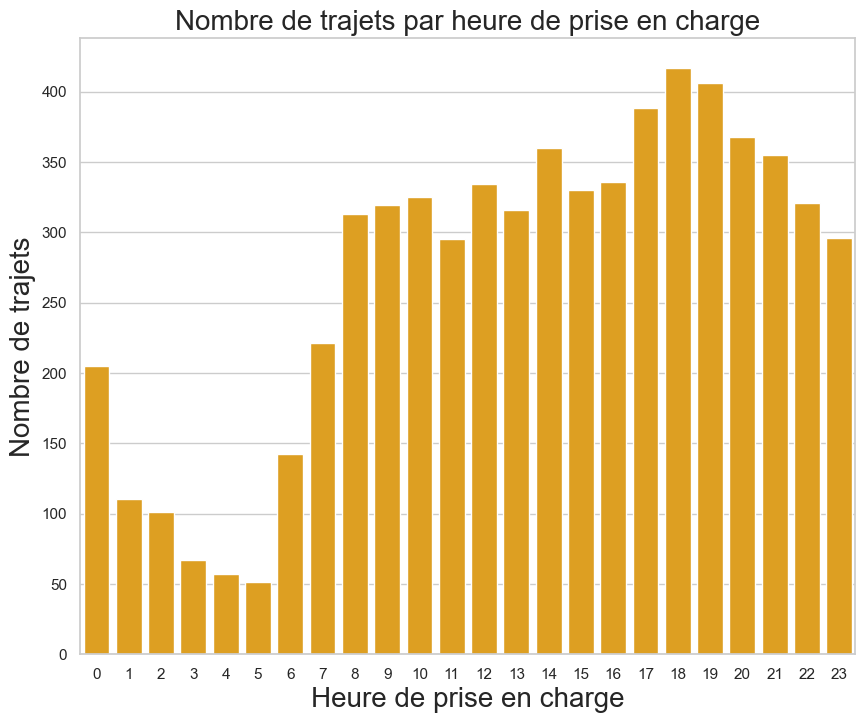

In [127]:
# barplot du nombre de trajets par heure de prise en charge
plt.figure(figsize=(10, 8))
sns.countplot(x='pickup_hour', data=df, color='#fca903')        
plt.xlabel('Heure de prise en charge',size=20)
plt.ylabel('Nombre de trajets',size=20)
plt.title('Nombre de trajets par heure de prise en charge',size=20)
plt.show()

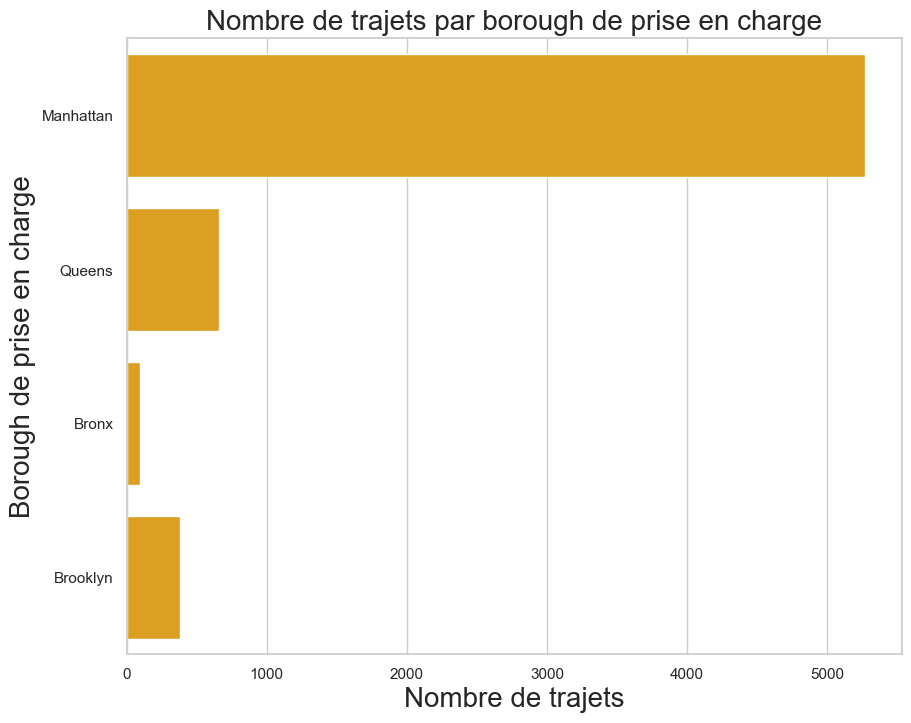

In [128]:
# en horisontal, nombre de trajets par borough de prise en charge
plt.figure(figsize=(10, 8))
sns.countplot(y='pickup_borough', data=df, color='#fca903')
plt.xlabel('Nombre de trajets',size=20)
plt.ylabel('Borough de prise en charge',size=20)
plt.title('Nombre de trajets par borough de prise en charge',size=20)
plt.show()  

### Diagrammes à barres groupées

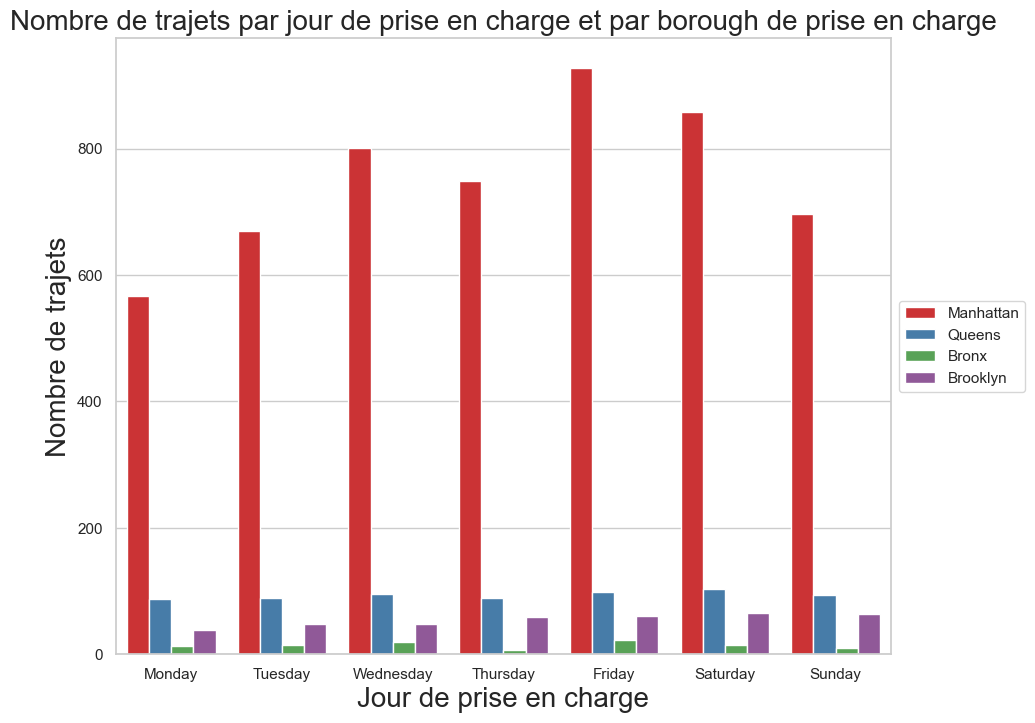

In [129]:
# barplot du nombre de trajets par jour de prise en charge par borough de prise en charge

plt.figure(figsize=(10, 8))
sns.countplot(x='pickup_dayofweek', hue='pickup_borough', data=df, palette='Set1')
plt.xlabel('Jour de prise en charge',size=20)
plt.ylabel('Nombre de trajets',size=20)
plt.title('Nombre de trajets par jour de prise en charge et par borough de prise en charge',size=20)
plt.legend(title='Borough de prise en charge', fontsize=12, title_fontsize=14) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

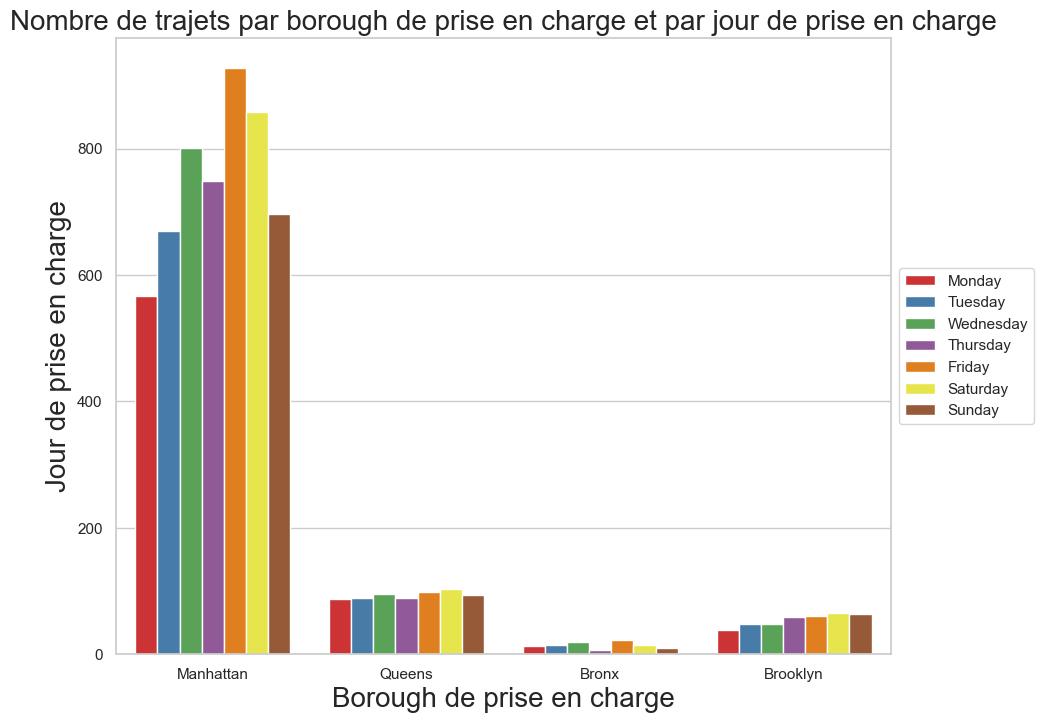

In [130]:
# barplot du nombre de trajets par borough de prise en charge par jour de prise en charge

plt.figure(figsize=(10, 8))
sns.countplot( x='pickup_borough', hue='pickup_dayofweek',data=df, palette='Set1')
plt.xlabel('Borough de prise en charge',size=20)
plt.ylabel('Jour de prise en charge',size=20)
plt.title('Nombre de trajets par borough de prise en charge et par jour de prise en charge',size=20)
plt.legend(title='Jour de prise en charge', fontsize=12, title_fontsize=14) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Boxplot multiples

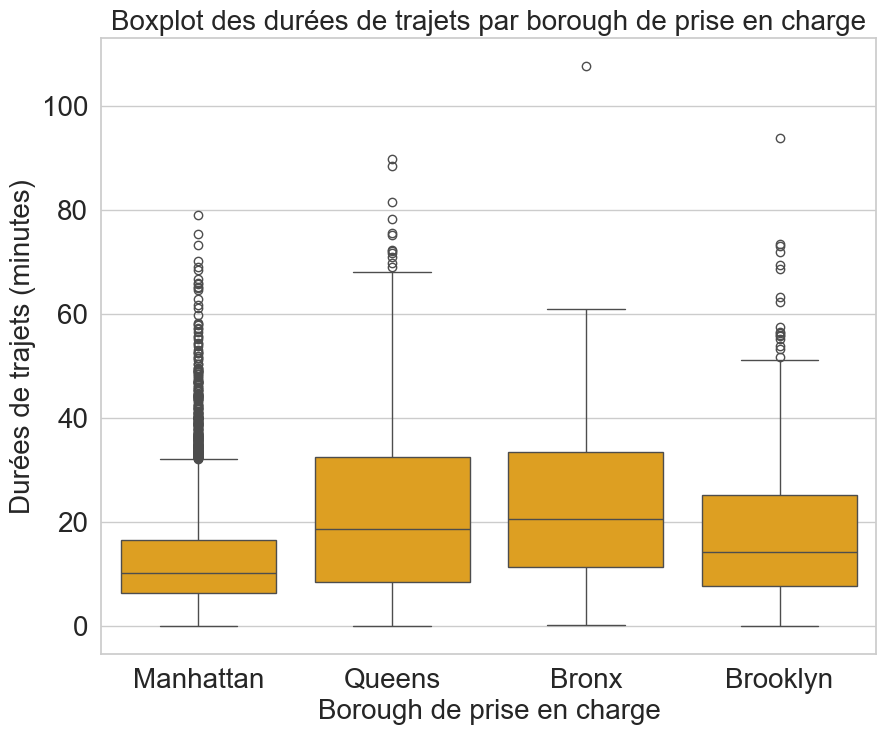

In [131]:
## boxplot des durées de trajets par borough de prise en charge
plt.figure(figsize=(10, 8))
sns.boxplot(x='pickup_borough', y='trip_duration', data=df, color='#fca903')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Borough de prise en charge',size=20)
plt.ylabel('Durées de trajets (minutes)',size=20)
plt.title('Boxplot des durées de trajets par borough de prise en charge',size=20)
plt.show()

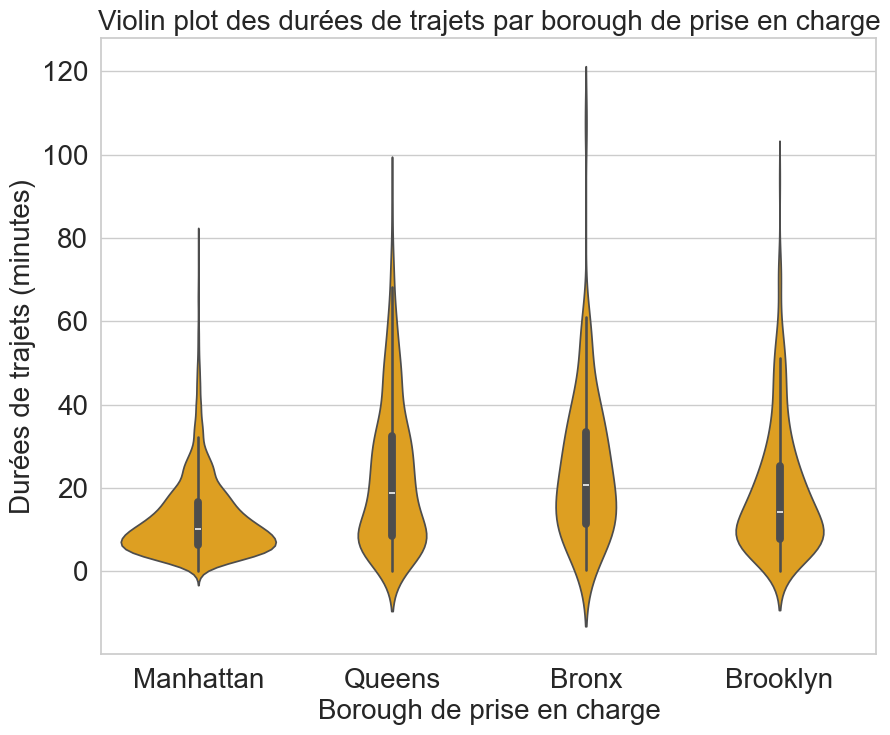

In [132]:
# ou avec la visualisation en violon plot, qui combine la KDE et le boxplot
plt.figure(figsize=(10, 8))
sns.violinplot(x='pickup_borough', y='trip_duration', data=df, color='#fca903')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Borough de prise en charge',size=20)
plt.ylabel('Durées de trajets (minutes)',size=20)
plt.title('Violin plot des durées de trajets par borough de prise en charge',size=20)
plt.show()

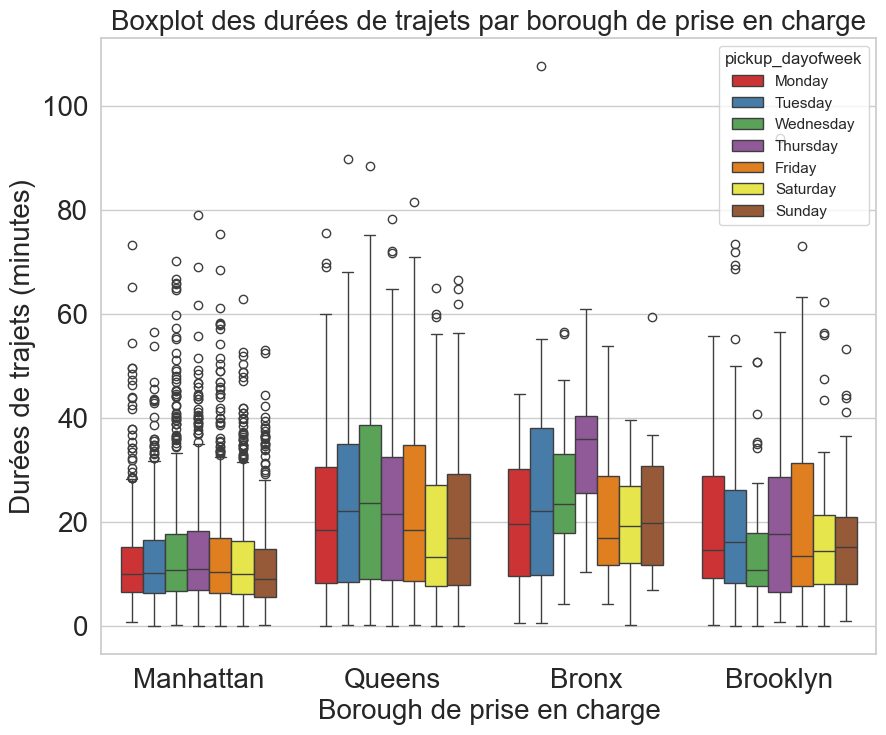

In [133]:
## boxplot des durées de trajets par borough de prise en charge par jour de prise en charge
plt.figure(figsize=(10, 8))
sns.boxplot(x='pickup_borough', y='trip_duration', hue='pickup_dayofweek', data=df, palette='Set1')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Borough de prise en charge',size=20)
plt.ylabel('Durées de trajets (minutes)',size=20)
plt.title('Boxplot des durées de trajets par borough de prise en charge',size=20)
plt.show()

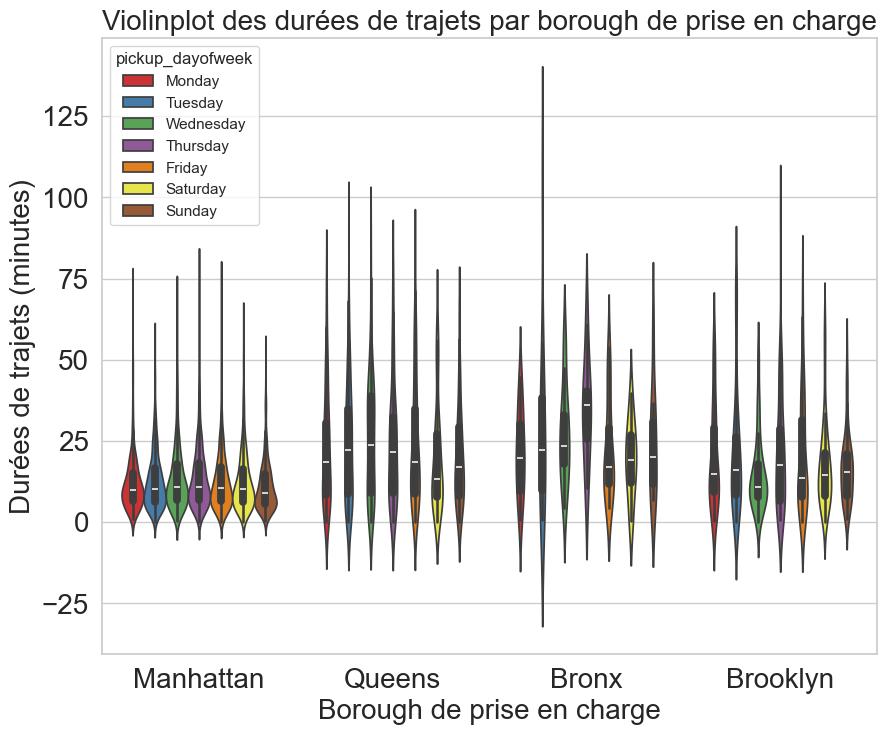

In [134]:
## violinplot des durées de trajets par borough de prise en charge par jour de prise en charge
plt.figure(figsize=(10, 8))
sns.violinplot(x='pickup_borough', y='trip_duration', hue='pickup_dayofweek', data=df, palette='Set1')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Borough de prise en charge',size=20)
plt.ylabel('Durées de trajets (minutes)',size=20)
plt.title('Violinplot des durées de trajets par borough de prise en charge',size=20)
plt.show()

# Composition

Pour les graphiques de composition, Seaborn n’est pas adapté. On peut utiliser d’autres bibliothèques spécialisées ou l’interface graphique de pandas (qui repose sur Matplotlib).

In [135]:
dfdays=df['pickup_dayofweek'].value_counts().reset_index()
dfdays

,pickup_dayofweek,count
0,Friday,1115
1,Saturday,1046
2,Wednesday,966
3,Thursday,905
4,Sunday,868
5,Tuesday,825
6,Monday,708


In [175]:
labels=list(dfdays['pickup_dayofweek'])
sizes = list(dfdays['count'])

In [137]:
labels

['Friday', 'Saturday', 'Wednesday', 'Thursday', 'Sunday', 'Tuesday', 'Monday']

In [138]:
sizes

[1115, 1046, 966, 905, 868, 825, 708]

In [176]:
colors= ['#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#984EA3', '#F781BF', '#A65628']

### Camembert

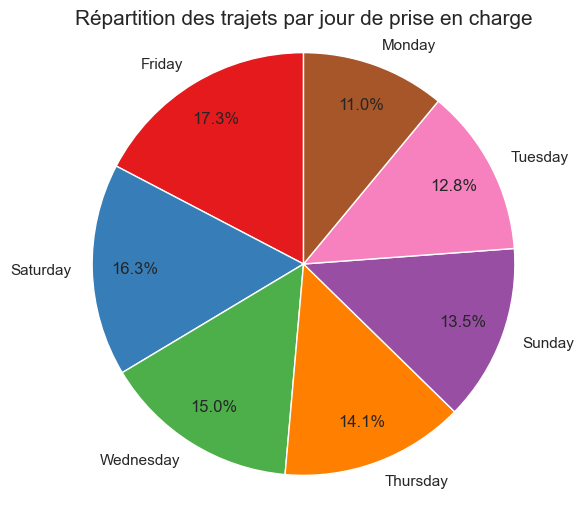

In [140]:
#camembert de la répartition des trajets par jour de prise en charge

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',    # affiche les pourcentages
    startangle=90,        # commence le graphique à 90 degrés
    pctdistance=0.8      # déplace les pourcentages vers l'extérieur
)
plt.title("Répartition des trajets par jour de prise en charge", size=15)
plt.axis('equal')  # maintient le cercle parfait
plt.show()

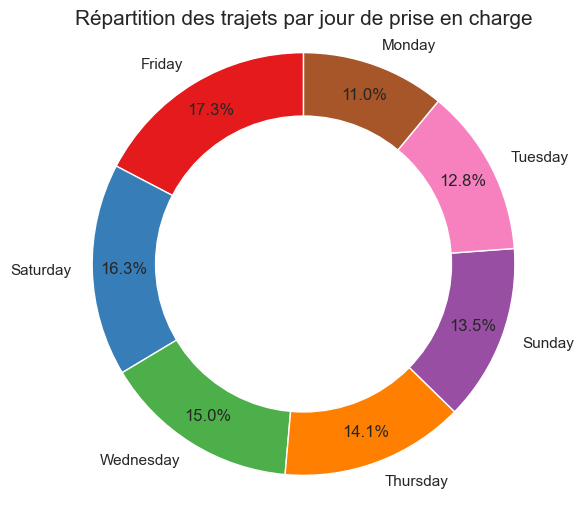

In [141]:
# donut de la répartition des trajets par jour de prise en charge
# pour créer un donut, on peut ajouter un cercle blanc au centre du camembert

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',    # affiche les pourcentages
    startangle=90,        # commence le graphique à 90 degrés
    pctdistance=0.85      # déplace les pourcentages vers l'extérieur
)

# Ajouter un cercle blanc au centre pour créer l'effet donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Répartition des trajets par jour de prise en charge", size=15)
plt.axis('equal')  # maintient le cercle parfait
plt.show()

## Treemaps

Pour créer une treemap en Python, il y a deux approches principales : utiliser une bibliothèque spécialisée comme Squarify (simple et rapide) ou des bibliothèques plus avancées/interactives comme Plotly.

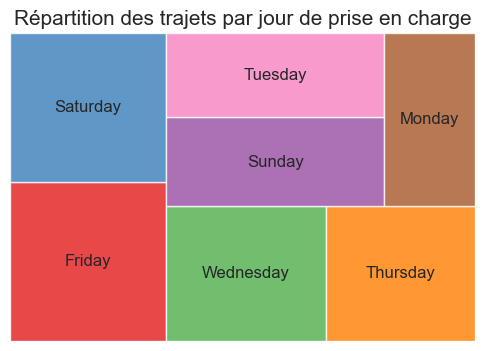

In [142]:
#pip install squarify 
#si vous ne l'avez pas déjà installé
import squarify

plt.figure(figsize=(6,4))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors)
plt.title("Répartition des trajets par jour de prise en charge", size=15)
plt.axis('off')
plt.show()

In [143]:
import plotly.express as px

fig = px.treemap(
    dfdays,
    path=["pickup_dayofweek"],
    values="count",
    title="Répartition des trajets par jour de prise en charge",
    width=800,   # largeur en pixel
    height=600   # hauteur en pixel
)

fig.show()

/opt/anaconda3/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Diagramme à barres empilés 

In [170]:
# dataframe nombre de trajets normalisé par jour de prise en charge et par borough de prise en charge
ct = pd.crosstab(df["pickup_dayofweek"], df["pickup_borough"])

In [171]:
ct

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_dayofweek,,,,
Monday,13,38,567,88
Tuesday,14,48,669,89
Wednesday,19,48,801,96
Thursday,7,59,749,89
Friday,22,60,928,99
Saturday,14,66,857,103
Sunday,10,64,697,93


In [172]:
# normaliser le dataframe ct par jour de prise en charge (c'est à dire par ligne)
ct_prop = ct.div(ct.sum(axis=1), axis=0)

In [173]:
ct_prop

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_dayofweek,,,,
Monday,0.018414,0.053824,0.803116,0.124646
Tuesday,0.017073,0.058537,0.815854,0.108537
Wednesday,0.019710,0.049793,0.830913,0.099585
Thursday,0.007743,0.065265,0.828540,0.098451
Friday,0.019838,0.054103,0.836790,0.089270
Saturday,0.013462,0.063462,0.824038,0.099038
Sunday,0.011574,0.074074,0.806713,0.107639


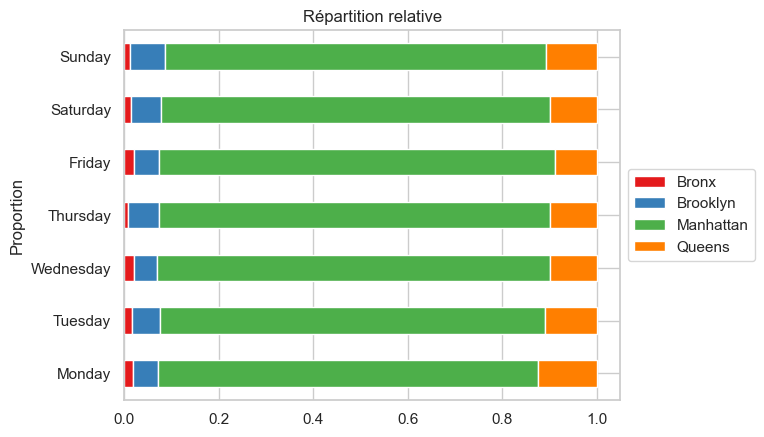

In [177]:
ct_prop.plot(kind="barh", stacked=True,color=colors)

plt.ylabel("Proportion")
plt.title("Répartition relative")
#legend hors du graphique
plt.legend(title='Jour de prise en charge', fontsize=12, title_fontsize=14) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# WORD CLOUD

In [157]:
# Texte à visualiser
testo = "an incel a portmanteau of involuntary celibate is a member of an online subculture of mostly male and heterosexual people who define themselves as unable to find a romantic or sexual partner despite desiring one they often blame objectify and denigrate women and girls as a result the term inspired a subculture that rose to prominence during the 2010s after being influenced by and associated with misogynist terrorists such as elliot rodger and alek minassian the incel subcultures online discourse has been characterized by resentment hostile sexism antifeminism sexual objectification and dehumanization of women misogyny misanthropy selfpity and selfloathing racism a sense of entitlement to sex nihilism rape culture and the endorsement of sexual and nonsexual violence against women and the sexually active incels tend to blame women and feminism for their inability to find a partner their romantic failures are often attributed to biological determinism where womens preference for mating with highstatus males nicknamed chads is seen as innate and unchangeable incel communities have been criticized by scholars government officials and others for their misogyny endorsement and encouragement of violence and extremism over time the subculture has become associated with extremism and terrorism and since 2014 there have been multiple mass killings mostly in north america perpetrated by selfidentified incels as well as other instances of violence or attempted violence the southern poverty law center splc describes incels as part of the online male supremacist ecosystem that is included in their list of hate groups the global internet forum to counter terrorism gifct states that the incel community shares a misogynistic ideology of women as being genetically inferior to men driven by their sexual desire to reproduce with genetically superior males thereby excluding unattractive men such as themselves which exhibits all of the hallmarks of an extremist ideology gifct states that incel beliefs combine a wish for a mythical past where all men were entitled to sex from subordinated women a sense of predestined personal failure and nihilism making it a dangerous ideology estimates of the overall size of the subculture vary greatly ranging from thousands to hundreds of thousands of individuals"


In [ ]:
# installer la bibliothèque si nécessaire
#pip install wordcloud

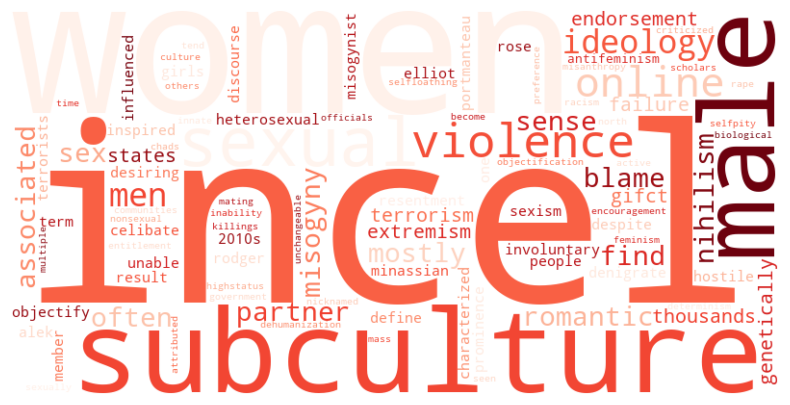

In [165]:
# 1. Importere les bibliothèques nécessaires
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 2. Creer le WordCloud
wordcloud = WordCloud(
    width=800,        # largeur de l'image
    height=400,       # hauteur de l'image
    background_color='white', # couleur de fond
    colormap='Reds',       # palette de couleurs
    max_words=100,    # nombre maximum de mots
).generate(testo)

# 3. Affichons le WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # supprimons les axes
plt.show()

# Graphiques de relation

## Nuage de points

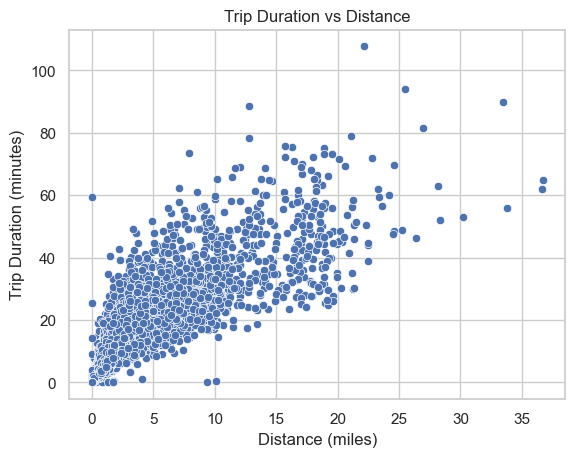

In [196]:
# nuage de points de la durée des trajets en fonction de la distance, coloré par borough de prise en charge
sns.scatterplot(x='distance', y='trip_duration', data=df)

plt.xlabel('Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs Distance')
plt.show()

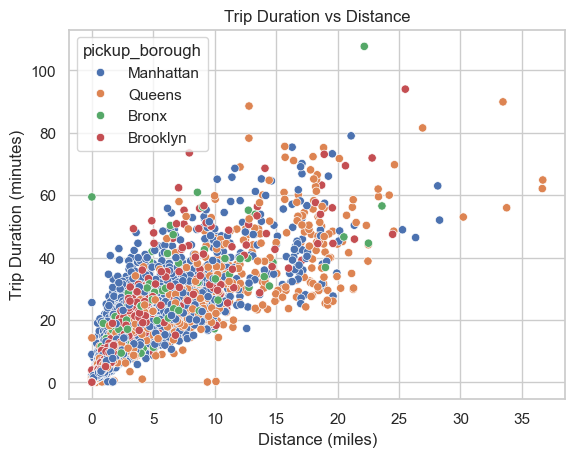

In [181]:
# nuage de points de la durée des trajets en fonction de la distance, coloré par borough de prise en charge
sns.scatterplot(x='distance', y='trip_duration', hue='pickup_borough', data=df)

plt.xlabel('Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs Distance')
plt.show()

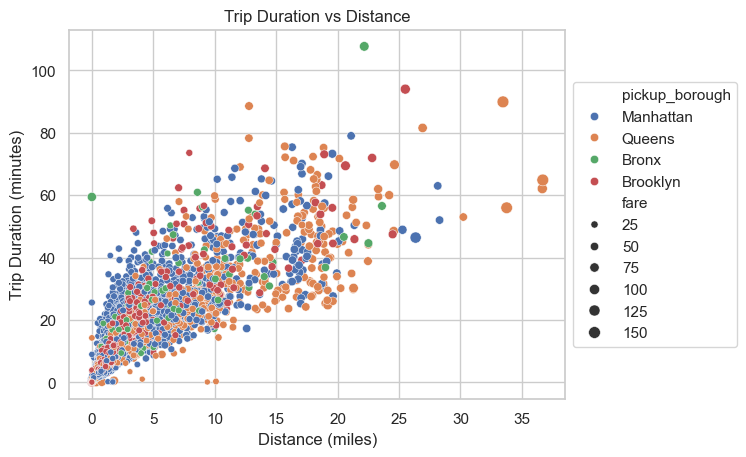

In [204]:
import numpy as np
# nuage de points de la durée des trajets en fonction de la distance avec des tailles basées sur le montant de la course et des couleurs basées sur le borough de prise en charge
sns.scatterplot(x='distance', y='trip_duration', size='fare', hue='pickup_borough', data=df)
plt.xlabel('Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs Distance')
plt.legend(title='Fare Amount')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Regression plot

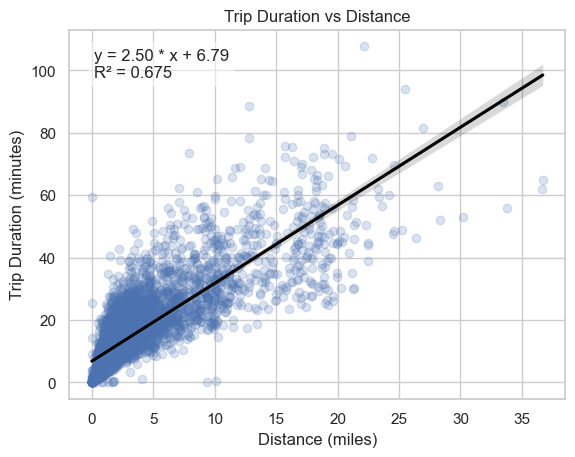

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# regression linéaire de la durée des trajets en fonction de la distance
sns.regplot(x='distance', y='trip_duration', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'black'})
#ajoutons les valeurs de la regression linéaire 
# pour ça, on va utiliser la bibliothèque scikit-learn pour faire la regression linéaire et récupérer les coefficients
X=df['distance'].values.reshape(-1, 1)  # variable indépendante (distance)
y=df['trip_duration'].values  # variable dépendante (durée des trajets)
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]      # coefficient de la distance
intercept = model.intercept_  # intercept de la regression linéaire
# Calulons le R2 de la regression linéaire

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)


plt.text(
    0.05, 0.95,  # position relative dans le graphique (0-1)
    f"y = {slope:.2f} * x + {intercept:.2f}\nR² = {r2:.3f}",
    transform=plt.gca().transAxes,  # système de coordonnées relatif à la figure
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5)
)

plt.xlabel('Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs Distance')
plt.show()

# Heatmap

In [207]:
borough_matrix = pd.crosstab(df['pickup_borough'], df['dropoff_borough'])

In [208]:
borough_matrix

dropoff_borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
pickup_borough,,,,,
Bronx,66,4,25,4,0
Brooklyn,5,282,67,26,0
Manhattan,55,153,4885,163,2
Queens,11,62,224,349,0


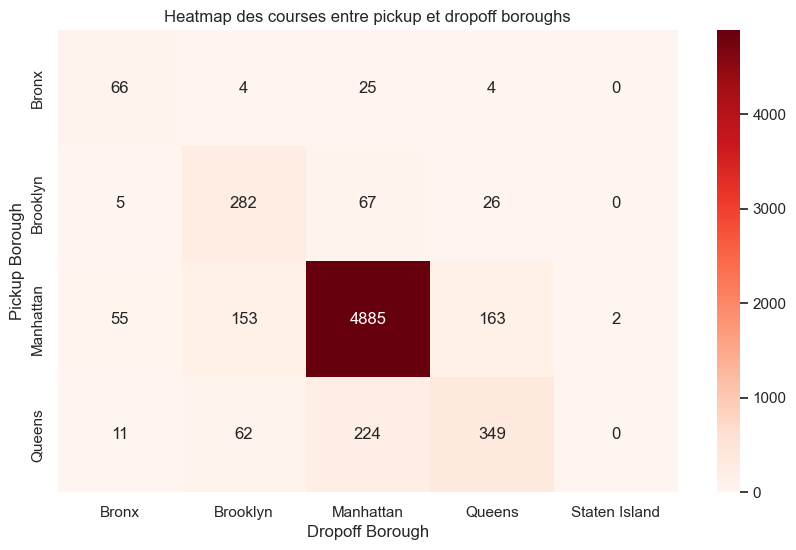

In [212]:
plt.figure(figsize=(10,6))
sns.heatmap(
    borough_matrix,
    annot=True,      # montrer les valeurs dans les cellules
    fmt="d",         # format entier
    cmap='Reds',   # palette de couleurs
    cbar=True
)
plt.title("Heatmap des courses entre pickup et dropoff boroughs")
plt.xlabel("Dropoff Borough")
plt.ylabel("Pickup Borough")
plt.show()

# Évolution temporelle

In [95]:
df=pd.read_csv('data/data_covid.csv')

In [96]:
df

,Entity,Code,Day,Deaths,Cases
0,Afghanistan,AFG,2020-01-09,0.0,0.0
1,Afghanistan,AFG,2020-01-10,0.0,0.0
2,Afghanistan,AFG,2020-01-11,0.0,0.0
3,Afghanistan,AFG,2020-01-12,0.0,0.0
4,Afghanistan,AFG,2020-01-13,0.0,0.0
...,...,...,...,...,...
511288,Zimbabwe,ZWE,2026-01-28,0.0,0.0
511289,Zimbabwe,ZWE,2026-01-29,0.0,0.0
511290,Zimbabwe,ZWE,2026-01-30,0.0,0.0
511291,Zimbabwe,ZWE,2026-01-31,0.0,0.0


In [97]:
df['Date'] = pd.to_datetime(df['Day'])

In [98]:
df

,Entity,Code,Day,Deaths,Cases,Date
0,Afghanistan,AFG,2020-01-09,0.0,0.0,2020-01-09
1,Afghanistan,AFG,2020-01-10,0.0,0.0,2020-01-10
2,Afghanistan,AFG,2020-01-11,0.0,0.0,2020-01-11
3,Afghanistan,AFG,2020-01-12,0.0,0.0,2020-01-12
4,Afghanistan,AFG,2020-01-13,0.0,0.0,2020-01-13
...,...,...,...,...,...,...
511288,Zimbabwe,ZWE,2026-01-28,0.0,0.0,2026-01-28
511289,Zimbabwe,ZWE,2026-01-29,0.0,0.0,2026-01-29
511290,Zimbabwe,ZWE,2026-01-30,0.0,0.0,2026-01-30
511291,Zimbabwe,ZWE,2026-01-31,0.0,0.0,2026-01-31


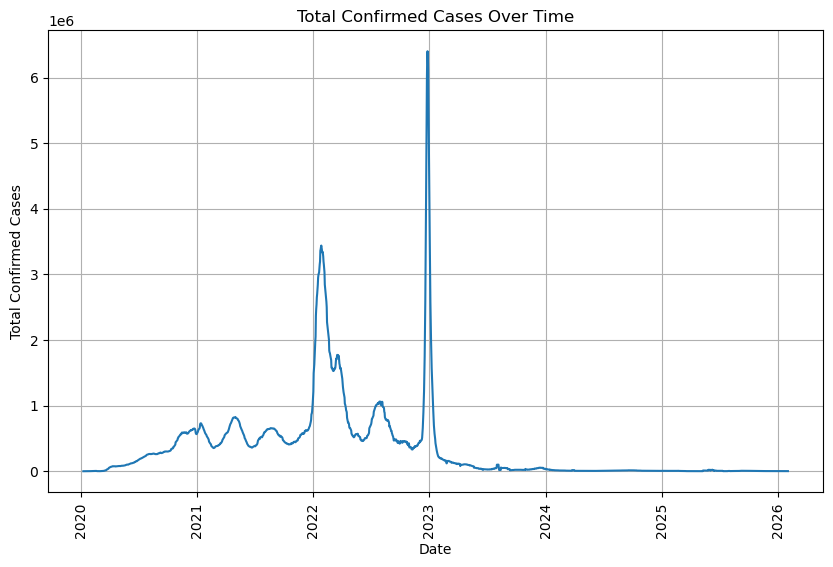

In [99]:
#visualiser l'evolution des cas confirmés 
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Cases',data=df,estimator='sum',errorbar=None)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed Cases Over Time')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

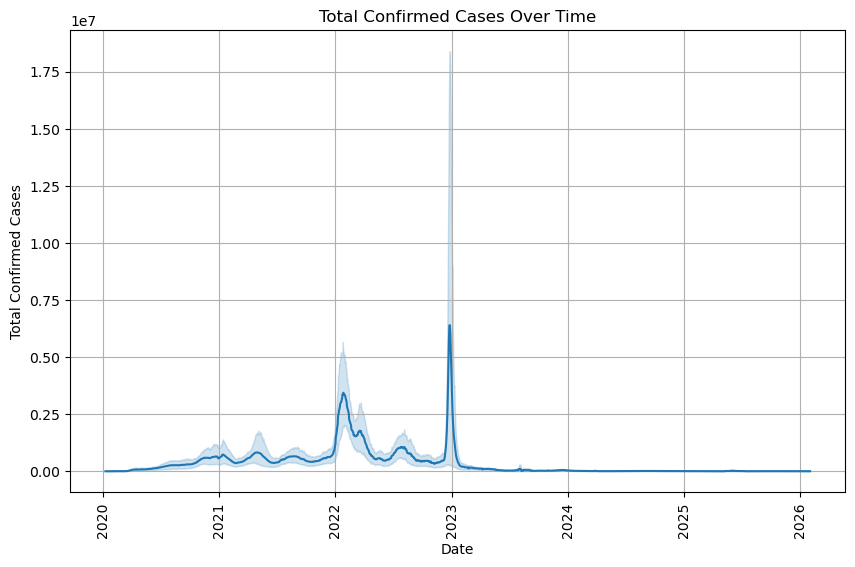

In [100]:
#visualiser l'evolution des cas confirmés  avec l'intervalle de confiance
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Cases',data=df,estimator='sum')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed Cases Over Time')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

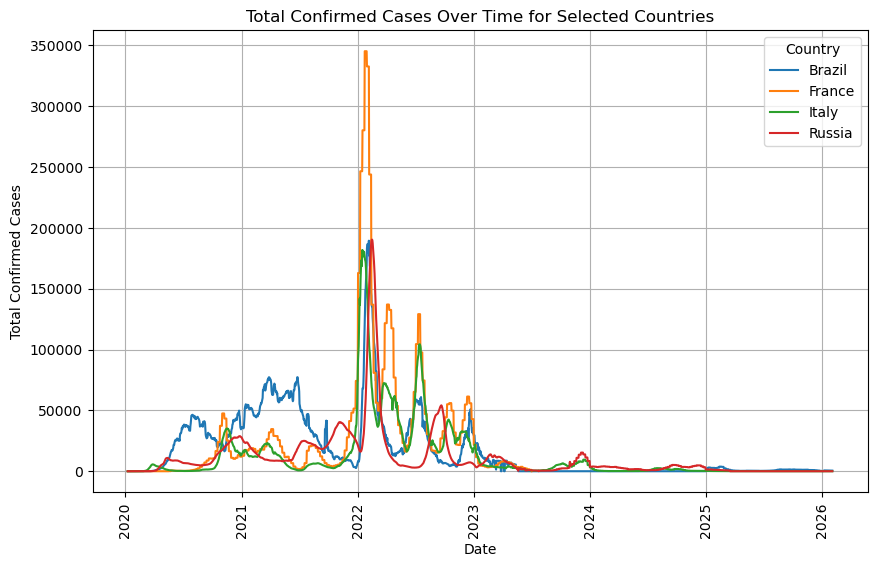

In [101]:
#visualiser les cas confirmés pour des pays sélectionnés
countries = ['US', 'Italy', 'France', 'Russia', 'Brazil']
df_selected = df[df['Entity'].isin(countries)]
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Cases', hue='Entity', data=df_selected,estimator='sum')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed Cases Over Time for Selected Countries')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.show()

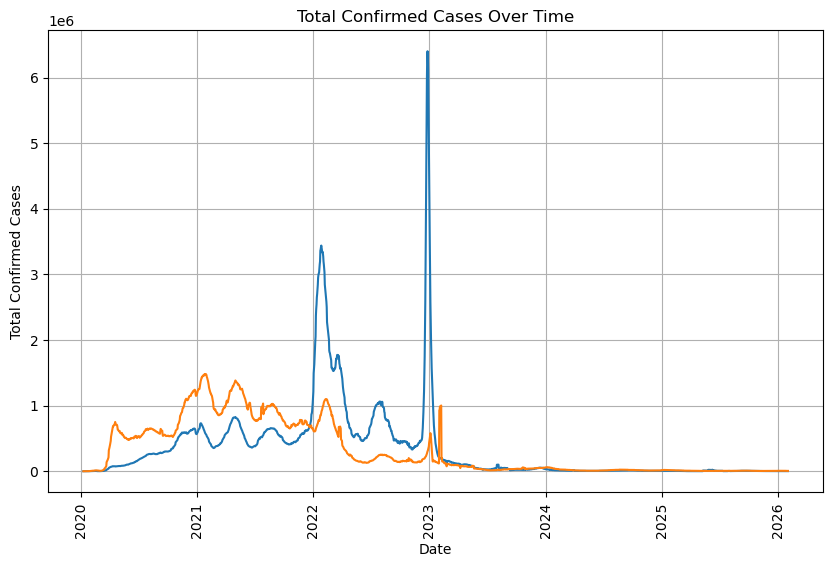

In [102]:
# je rescale les décès pour les afficher sur le même graphique que les cas confirmés
df['rescaled_deaths'] = df['Deaths'] *100

#visualiser les cas confirmés et les décès rescalés sur le même graphique
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Cases',data=df,estimator='sum',errorbar=None)
sns.lineplot(x='Date', y='rescaled_deaths',data=df,estimator='sum',errorbar=None)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed Cases Over Time')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()